In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gene_stats = pd.read_csv('../results/merge_gene_stats/merged_gene_stats.tsv', sep='\t')

<Axes: >

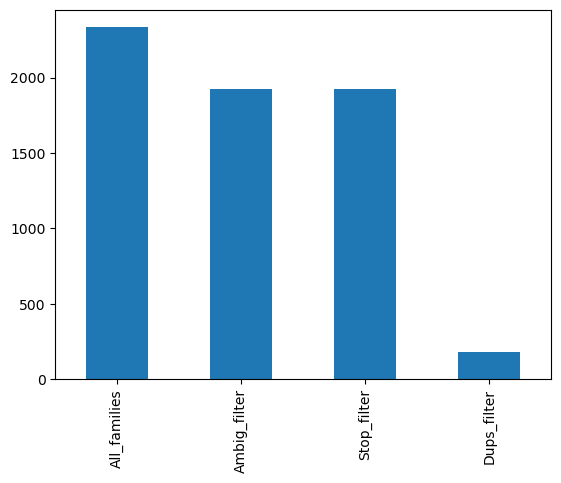

In [3]:
# Gene Families per filtering step
plot_series = pd.Series({'All_families': len(gene_stats)})
filter_counts = gene_stats[['Ambig_filter', 'Stop_filter', 'Dups_filter']] > 3
filter_counts = filter_counts.apply(sum)
plot_series = pd.concat([plot_series, filter_counts])
plot_series.plot(kind='bar')

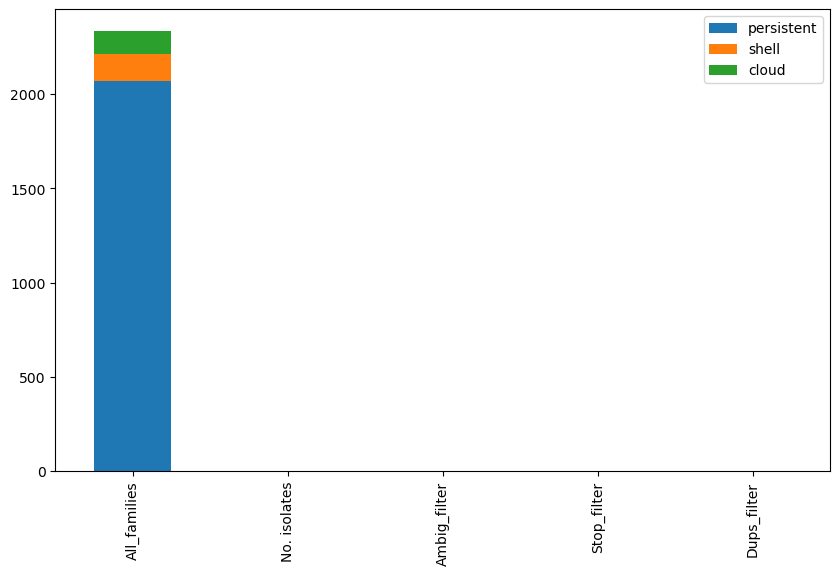

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume gene_stats is your DataFrame and contains the following columns:
# - 'Annotation' with values 'persistent', 'shell', or 'cloud'
# - 'No. isolates', 'Ambig_filter', 'Stop_filter', 'Dups_filter'

# List of Annotation categories
annotations = ['persistent', 'shell', 'cloud']

# Step 1: Calculate counts for 'All_families'
all_families_counts = gene_stats['Non-unique Gene name'].value_counts().reindex(annotations, fill_value=0)

# Step 2: Initialize DataFrame with 'All_families' counts
plot_df = pd.DataFrame(index=annotations)
plot_df['All_families'] = all_families_counts

# Filtering columns
filter_columns = ['No. isolates', 'Ambig_filter', 'Stop_filter', 'Dups_filter']

# Step 2: Calculate counts for each filter
for col in filter_columns:
    mask = gene_stats[col] > 3
    counts = gene_stats[mask]['Non-unique Gene name'].value_counts().reindex(annotations, fill_value=0)
    plot_df[col] = counts

# Step 3: Transpose the DataFrame
plot_df = plot_df.T

# Step 4: Plot the data
ax = plot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

